***
### CAPSTONE PROJECT 3: FEATURE ENGINEERING/PRE-PROCESSING/MODELING ###
***
- Review the PCA's generated from the DATA CLEANING/EDA 
- Determine how many PCAs required
- Deterrmine if only most important Eigen values from PCAs would be sufficient to model.
- separate table into X and y sets.
- create Train and test data sets.
- setup ARIMA models
- setup LSTM Model
- setup VAR model.
- train models
- evaluate models.
- decide which model serves best and why.

In [230]:
# Basic Data Science Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models to test and scalar
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX



##### FEATURE ENGINEERING
***
Determine Number of PCA's Required or if only important Eigen values from PCAs would be sufficient for our model

In [231]:
bitcoin_df = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\bitcoin_df_cleaned')
most_important_features = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\most_important_features')

In [232]:
bitcoin_df.head()

,date,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,2009-01-03,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
1,2009-01-04,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
2,2009-01-05,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
3,2009-01-06,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
4,2009-01-07,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025


In [233]:
bitcoin_df.columns

Index(['date', 'USD Exchange Trade Volume', 'Total Transaction Fees USD',
       'Total Transaction Fees', 'Total Output Volume', 'Total Bitcoins',
       'Transaction Excluding Popular Addresses',
       'Number of Transactions per Block', 'Total Number of Transactions',
       'Number of Transactions', 'Number of Unique Addresses Used',
       'My Wallet Transaction Volume', 'My Wallet Number of Users',
       'Number of Transactions per Day', 'Market Capitalization',
       'Market Price', 'Miners Revenue', 'Hash Rate',
       'Estimated Transaction Volume USD', 'Estimated Transaction Volume',
       'Difficulty', 'Cost Percent of Transaction Volume',
       'Cost per Transaction', 'API Blockchain Size', 'Average Block Size',
       'Median Transaction Confirmation Time', 'PCA1', 'PCA2', 'PCA3', 'PCA4',
       'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12'],
      dtype='object')

In [234]:
print(most_important_features['Feature Name'])

0                             Difficulty
1                  Market Capitalization
2       Estimated Transaction Volume USD
3              USD Exchange Trade Volume
4           Total Number of Transactions
5                              Hash Rate
6              My Wallet Number of Users
7                         Miners Revenue
8              My Wallet Number of Users
9                    Total Output Volume
10            Total Transaction Fees USD
11    Cost Percent of Transaction Volume
Name: Feature Name, dtype: object


Since we're dealing with Cybercurrency rather than stocks, we should resample this data taking the final value per month and also start performing percentchanges per column and autocorrelation functions as we curate a final feature set with which to model.

In [235]:
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
bitcoin_df.set_index('date', inplace=True)
monthly_bitcoin_df = bitcoin_df.resample(rule='M').last()

In [236]:
monthly_bitcoin_df.head()

,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,Number of Unique Addresses Used,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,0.0,0.0,0.0,6900.0,131350.0,118.0,1.0000,2660.0,118.0,118.0,...,0.565633,-0.624664,-0.082270,0.002458,0.245686,0.332645,-0.596459,0.024101,0.338810,-0.197246
2009-02-28,0.0,0.0,0.0,5650.0,300350.0,107.0,1.0101,5894.0,100.0,107.0,...,0.560841,-0.624533,-0.080818,-0.003430,0.245534,0.330761,-0.590856,0.024245,0.331745,-0.193094
2009-03-31,0.0,0.0,0.0,7100.0,473700.0,111.0,1.0000,9564.0,107.0,107.0,...,0.555870,-0.622593,-0.083748,-0.008178,0.244914,0.328785,-0.585899,0.024475,0.324328,-0.188681
2009-04-30,0.0,0.0,0.0,6550.0,646200.0,131.0,1.0000,13031.0,123.0,123.0,...,0.550927,-0.620732,-0.084030,-0.011903,0.243679,0.325225,-0.581295,0.024595,0.316735,-0.184322
2009-05-31,0.0,0.0,0.0,3700.0,814050.0,74.0,1.0000,16407.0,74.0,97.0,...,1.504016,-3.840696,64.677784,0.338447,-3.467730,-0.868214,1.005480,-0.029261,-0.245632,0.111518


In [237]:
most_important_features_list = list(most_important_features['Feature Name'].unique())

In [238]:
def feature_correlation(df, feature_list):
    pct_change_df = pd.DataFrame()
    for feature in feature_list:
       pct_change_df[f'{feature}_RET']  = df[feature].pct_change()
       
    corr = pct_change_df.corr()
    sns.heatmap(corr)

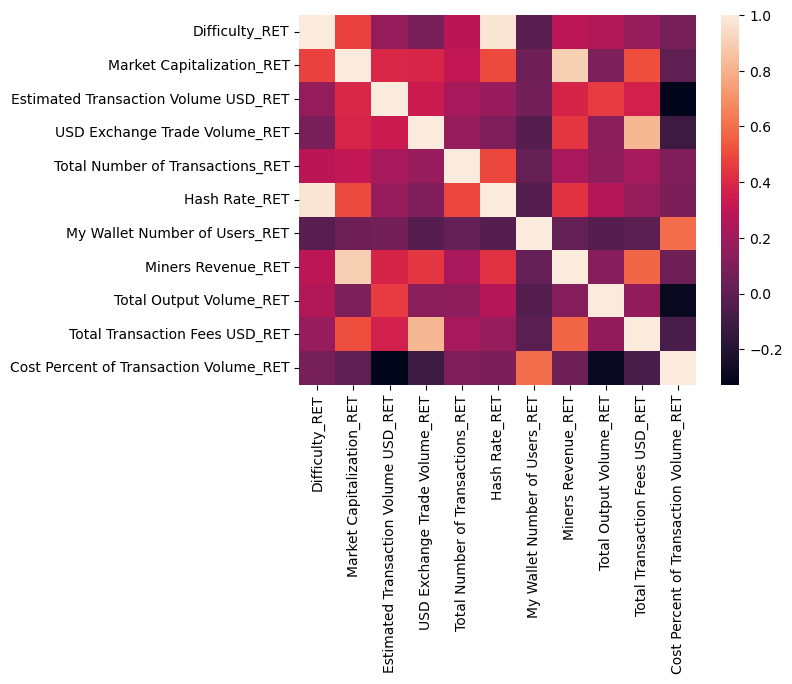

In [239]:
_ = feature_correlation(monthly_bitcoin_df, most_important_features_list)

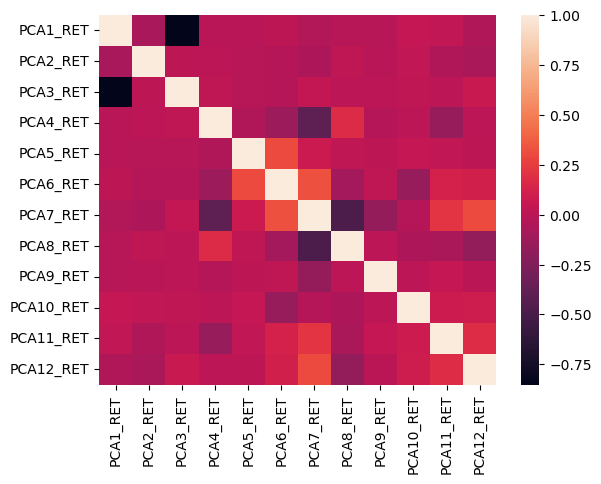

In [240]:
PCA_list = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12']
pct_change_df = feature_correlation(monthly_bitcoin_df, PCA_list)

These heatmaps pretty clearly say that for our feature set, we should use our curated PCAs rather then the primary Eigen values particularly since their degree of correlation is almost all zero which means little to no correlation between these PC vectors.  which for a multivariate time series analysis is exactly what we want.  NO CONFOUNDING VARIABLES!

In [241]:
monthly_pca_bitcoin_df = monthly_bitcoin_df[PCA_list]
monthly_pca_bitcoin_df['Market Price'] = monthly_bitcoin_df.loc[:,'Market Price']

C:\Users\micha\AppData\Local\Temp\ipykernel_27776\203295870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df['Market Price'] = monthly_bitcoin_df.loc[:,'Market Price']


In [242]:
monthly_pca_bitcoin_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Market Price
date,,,,,,,,,,,,,
2009-01-31,-4.311894,-1.941027,0.565633,-0.624664,-0.082270,0.002458,0.245686,0.332645,-0.596459,0.024101,0.338810,-0.197246,0.0
2009-02-28,-4.305432,-1.935971,0.560841,-0.624533,-0.080818,-0.003430,0.245534,0.330761,-0.590856,0.024245,0.331745,-0.193094,0.0
2009-03-31,-4.298641,-1.929858,0.555870,-0.622593,-0.083748,-0.008178,0.244914,0.328785,-0.585899,0.024475,0.324328,-0.188681,0.0
2009-04-30,-4.291903,-1.923502,0.550927,-0.620732,-0.084030,-0.011903,0.243679,0.325225,-0.581295,0.024595,0.316735,-0.184322,0.0
2009-05-31,-4.724830,-3.294112,1.504016,-3.840696,64.677784,0.338447,-3.467730,-0.868214,1.005480,-0.029261,-0.245632,0.111518,0.0


In [243]:
pct_change_df = pd.DataFrame()
for feature in PCA_list:
    pct_change_df[f'{feature}_RET']  = monthly_bitcoin_df[feature].pct_change()

In [244]:
for col in pct_change_df.columns:
    print(f'Autocorrelation for {col} is: {pct_change_df[col]}')

Autocorrelation for PCA1_RET is: date
2009-01-31         NaN
2009-02-28   -0.001499
2009-03-31   -0.001577
2009-04-30   -0.001567
2009-05-31    0.100871
                ...   
2023-12-31    0.454556
2024-01-31   -0.199415
2024-02-29    0.252745
2024-03-31   -0.158165
2024-04-30    0.118616
Freq: M, Name: PCA1_RET, Length: 184, dtype: float64
Autocorrelation for PCA2_RET is: date
2009-01-31         NaN
2009-02-28   -0.002604
2009-03-31   -0.003158
2009-04-30   -0.003294
2009-05-31    0.712560
                ...   
2023-12-31   -0.723025
2024-01-31    3.189300
2024-02-29    0.517368
2024-03-31    0.343781
2024-04-30   -0.157031
Freq: M, Name: PCA2_RET, Length: 184, dtype: float64
Autocorrelation for PCA3_RET is: date
2009-01-31         NaN
2009-02-28   -0.008472
2009-03-31   -0.008864
2009-04-30   -0.008892
2009-05-31    1.729972
                ...   
2023-12-31   -4.201994
2024-01-31   -1.110915
2024-02-29   -9.887594
2024-03-31   -1.083249
2024-04-30   -3.216972
Freq: M, Name: PCA3_R

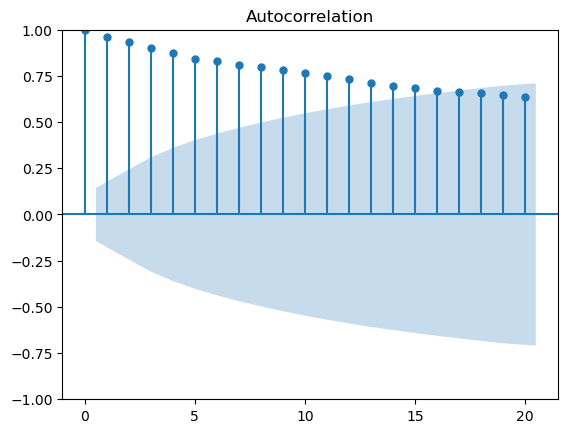

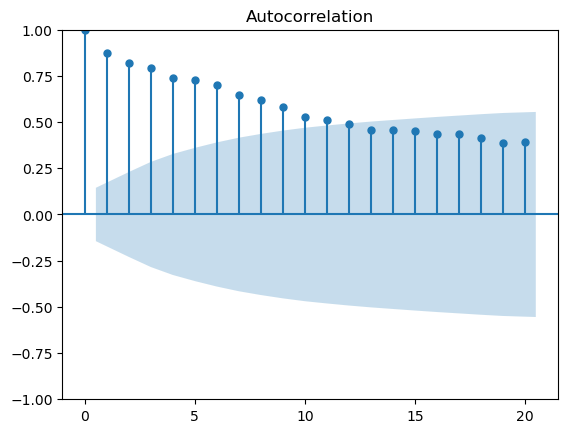

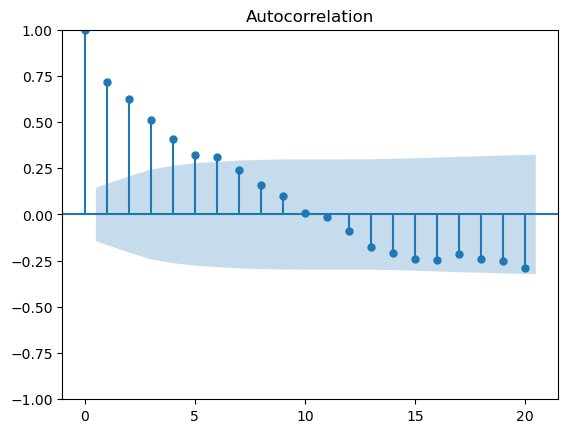

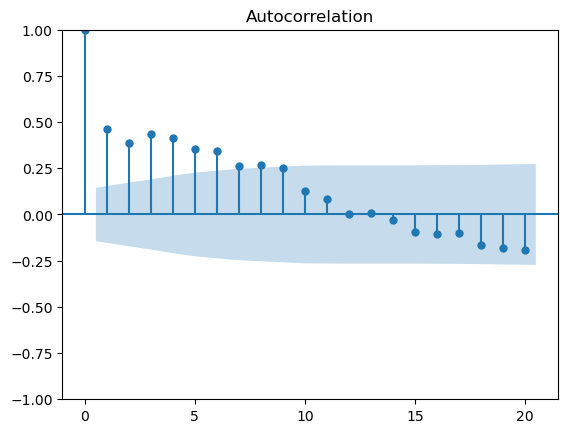

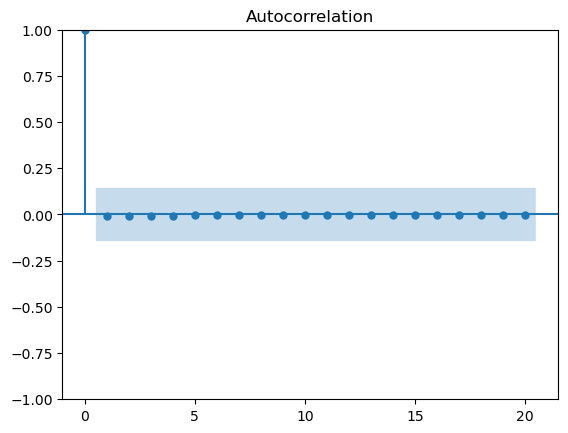

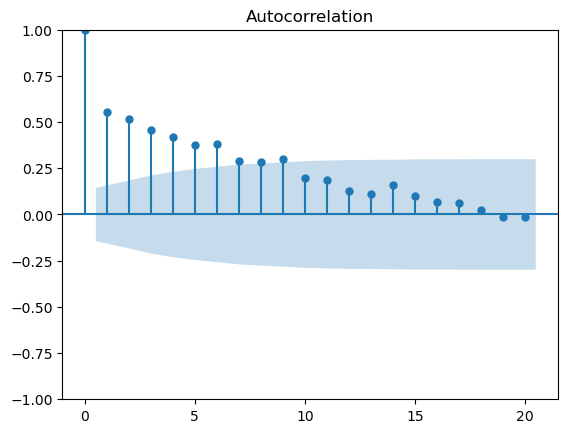

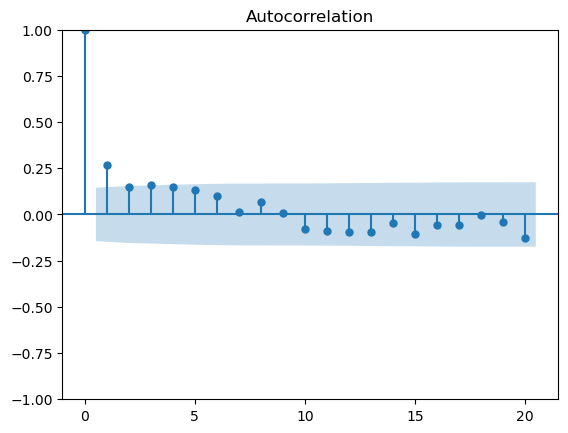

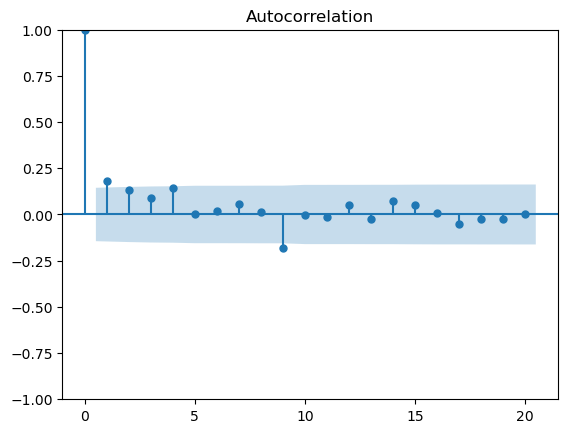

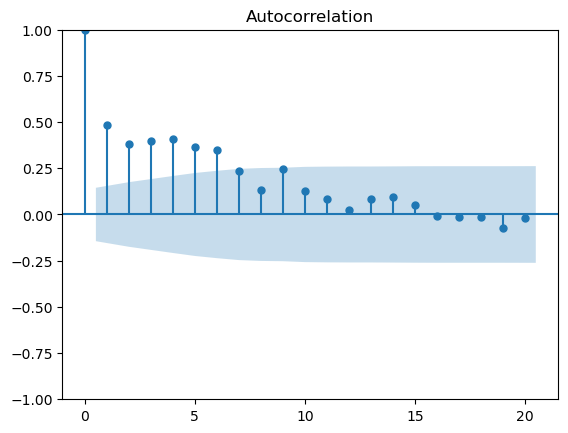

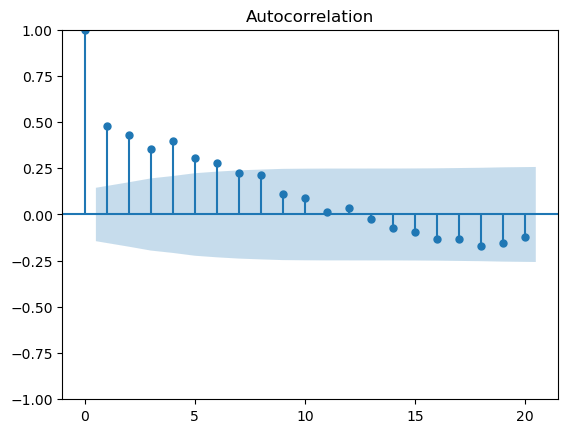

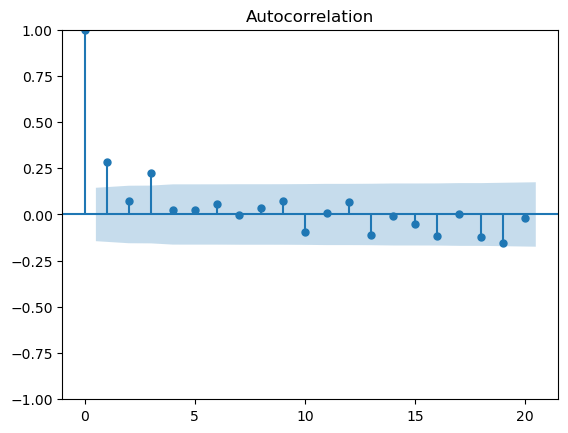

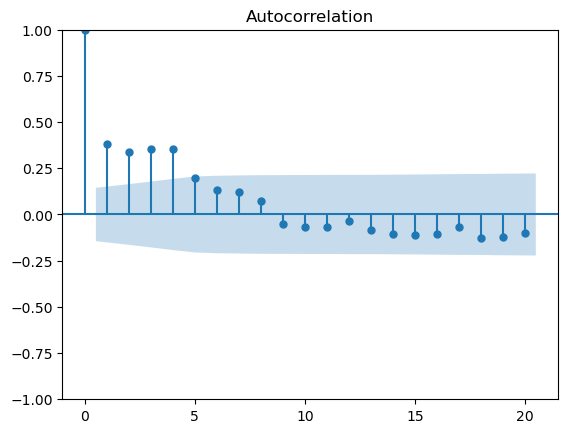

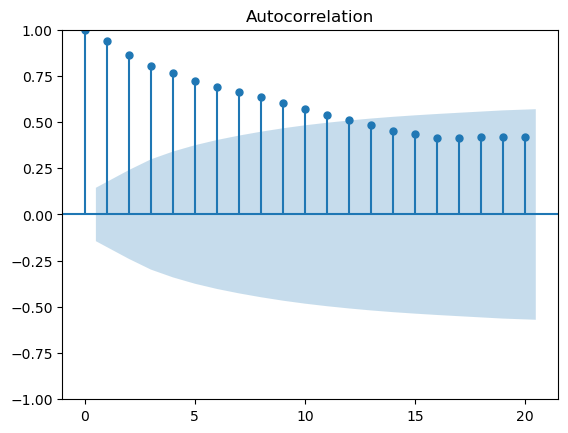

In [245]:
for col in monthly_pca_bitcoin_df.columns:
    plot_acf(monthly_pca_bitcoin_df[col], lags=20, alpha=0.05)

In [246]:
for col in monthly_pca_bitcoin_df.columns:
    results = adfuller(monthly_pca_bitcoin_df[col])
    print(f'{col}: {results[1]}')

PCA1: 0.9944748550606024
PCA2: 0.6517859771979693
PCA3: 0.0013995197695529913
PCA4: 0.004092780530273395
PCA5: 9.140132376773319e-05
PCA6: 0.7336435104690945
PCA7: 7.825905735425065e-07
PCA8: 2.4753876513904543e-20
PCA9: 0.03954767702106017
PCA10: 0.012464863379960804
PCA11: 1.1540659673330123e-05
PCA12: 0.0015688317695837755
Market Price: 0.9193719866523259


As per the adfuller test: PCA's _1, 2, 6_ and _Market Price_ are non-stationary whilst the rest are comfortably below our p-values indicating their usefulness for modeling.

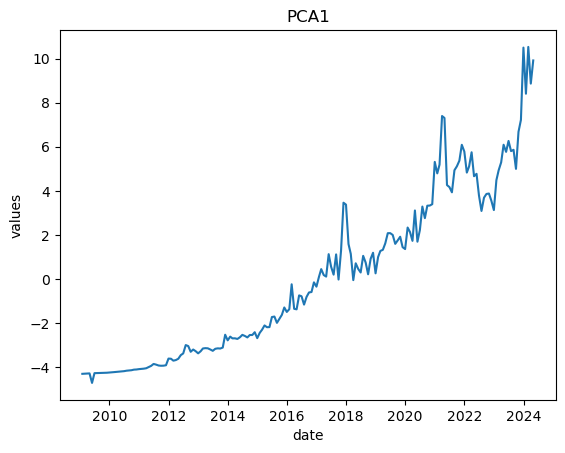

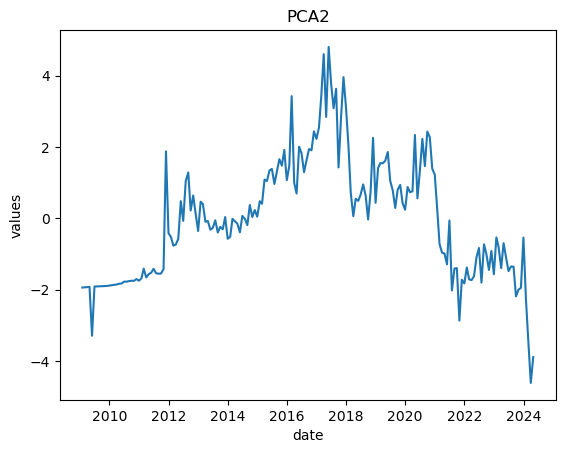

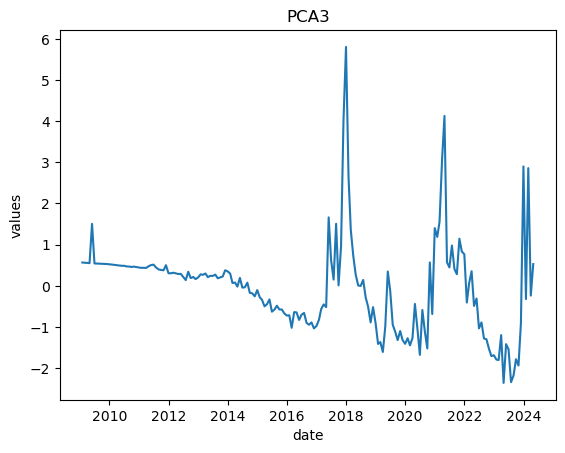

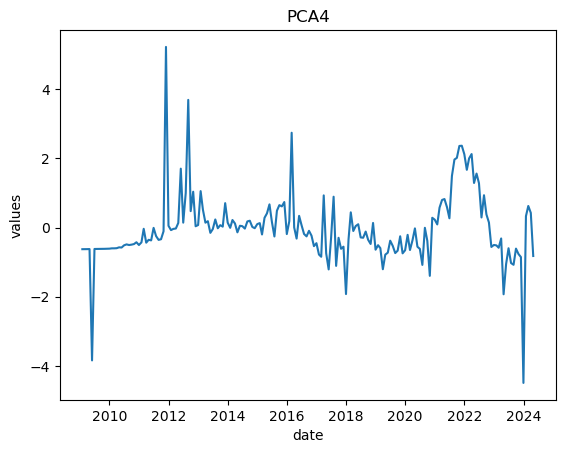

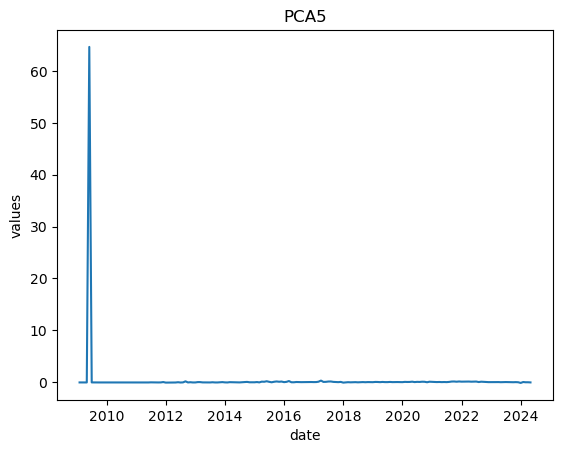

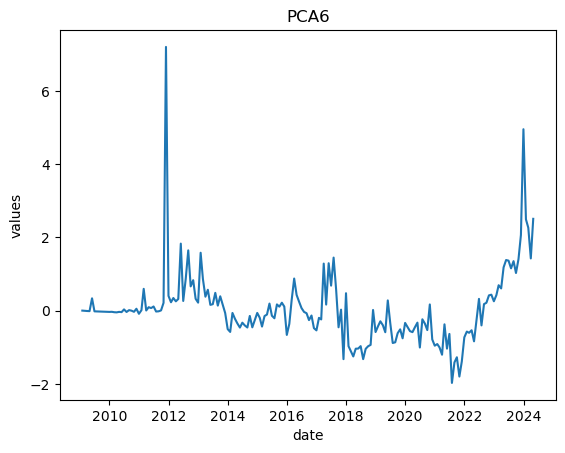

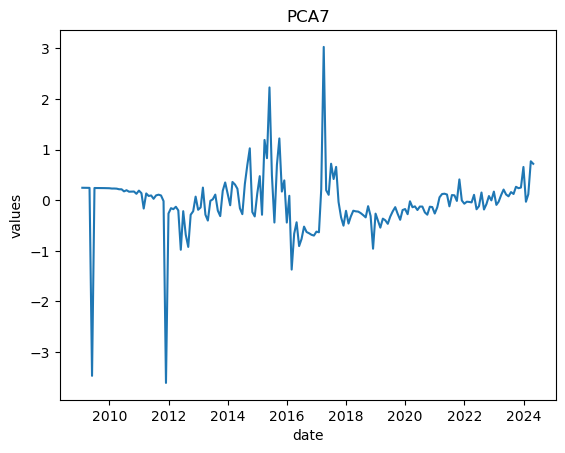

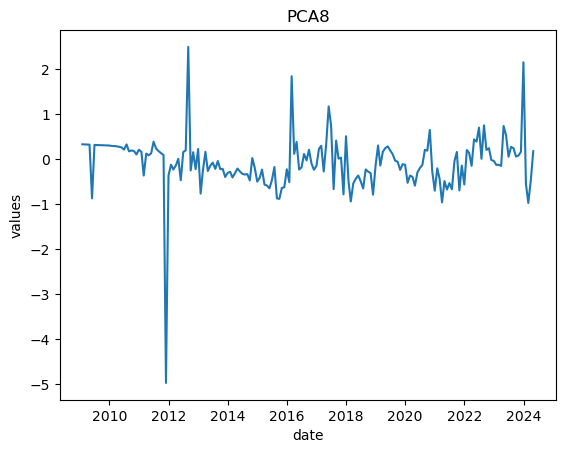

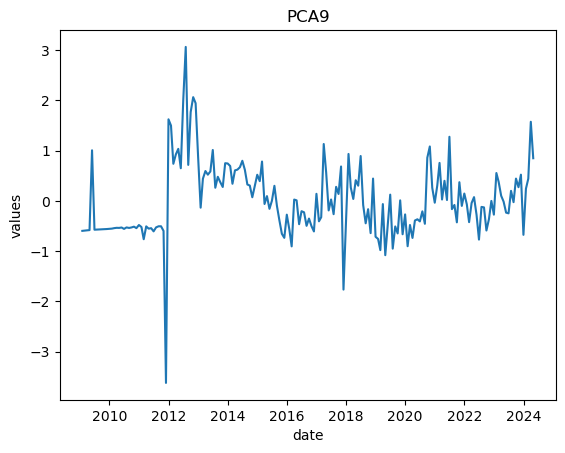

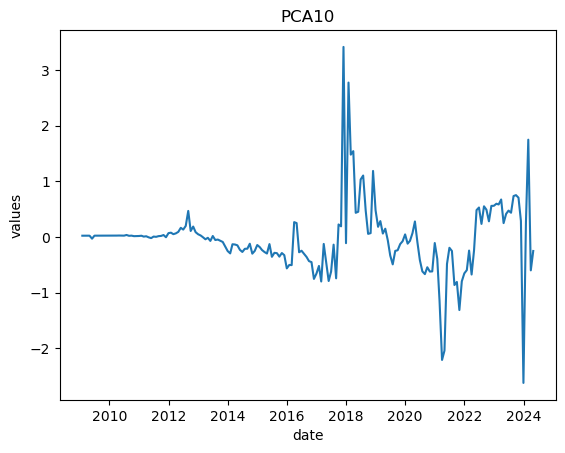

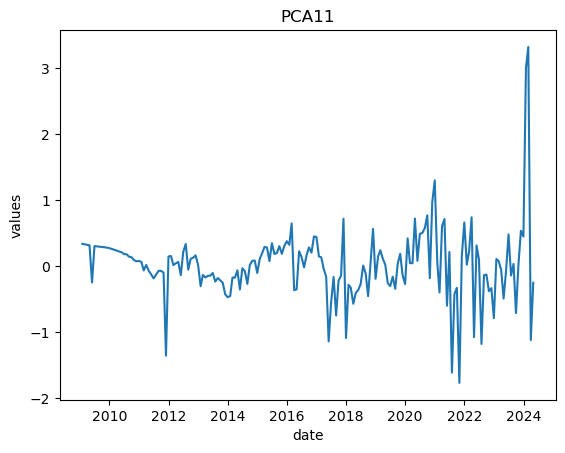

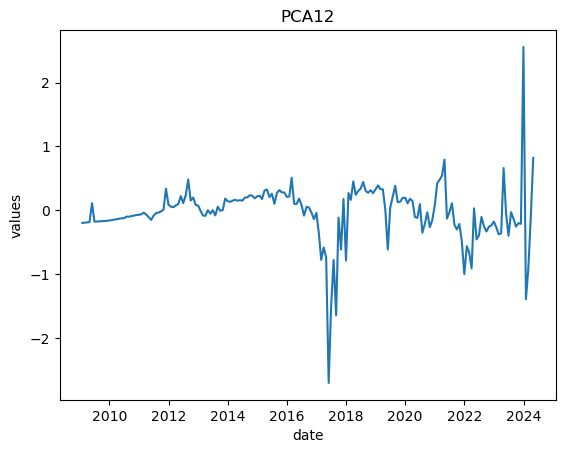

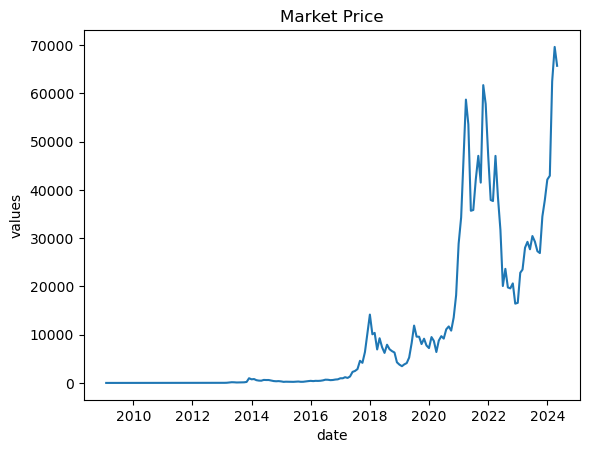

In [247]:
for feature in monthly_pca_bitcoin_df.columns:
    sns.lineplot(monthly_pca_bitcoin_df[feature])
    plt.title(feature)
    plt.xlabel('date')
    plt.ylabel('values')
    plt.show()
    plt.close()

c:\Users\micha\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


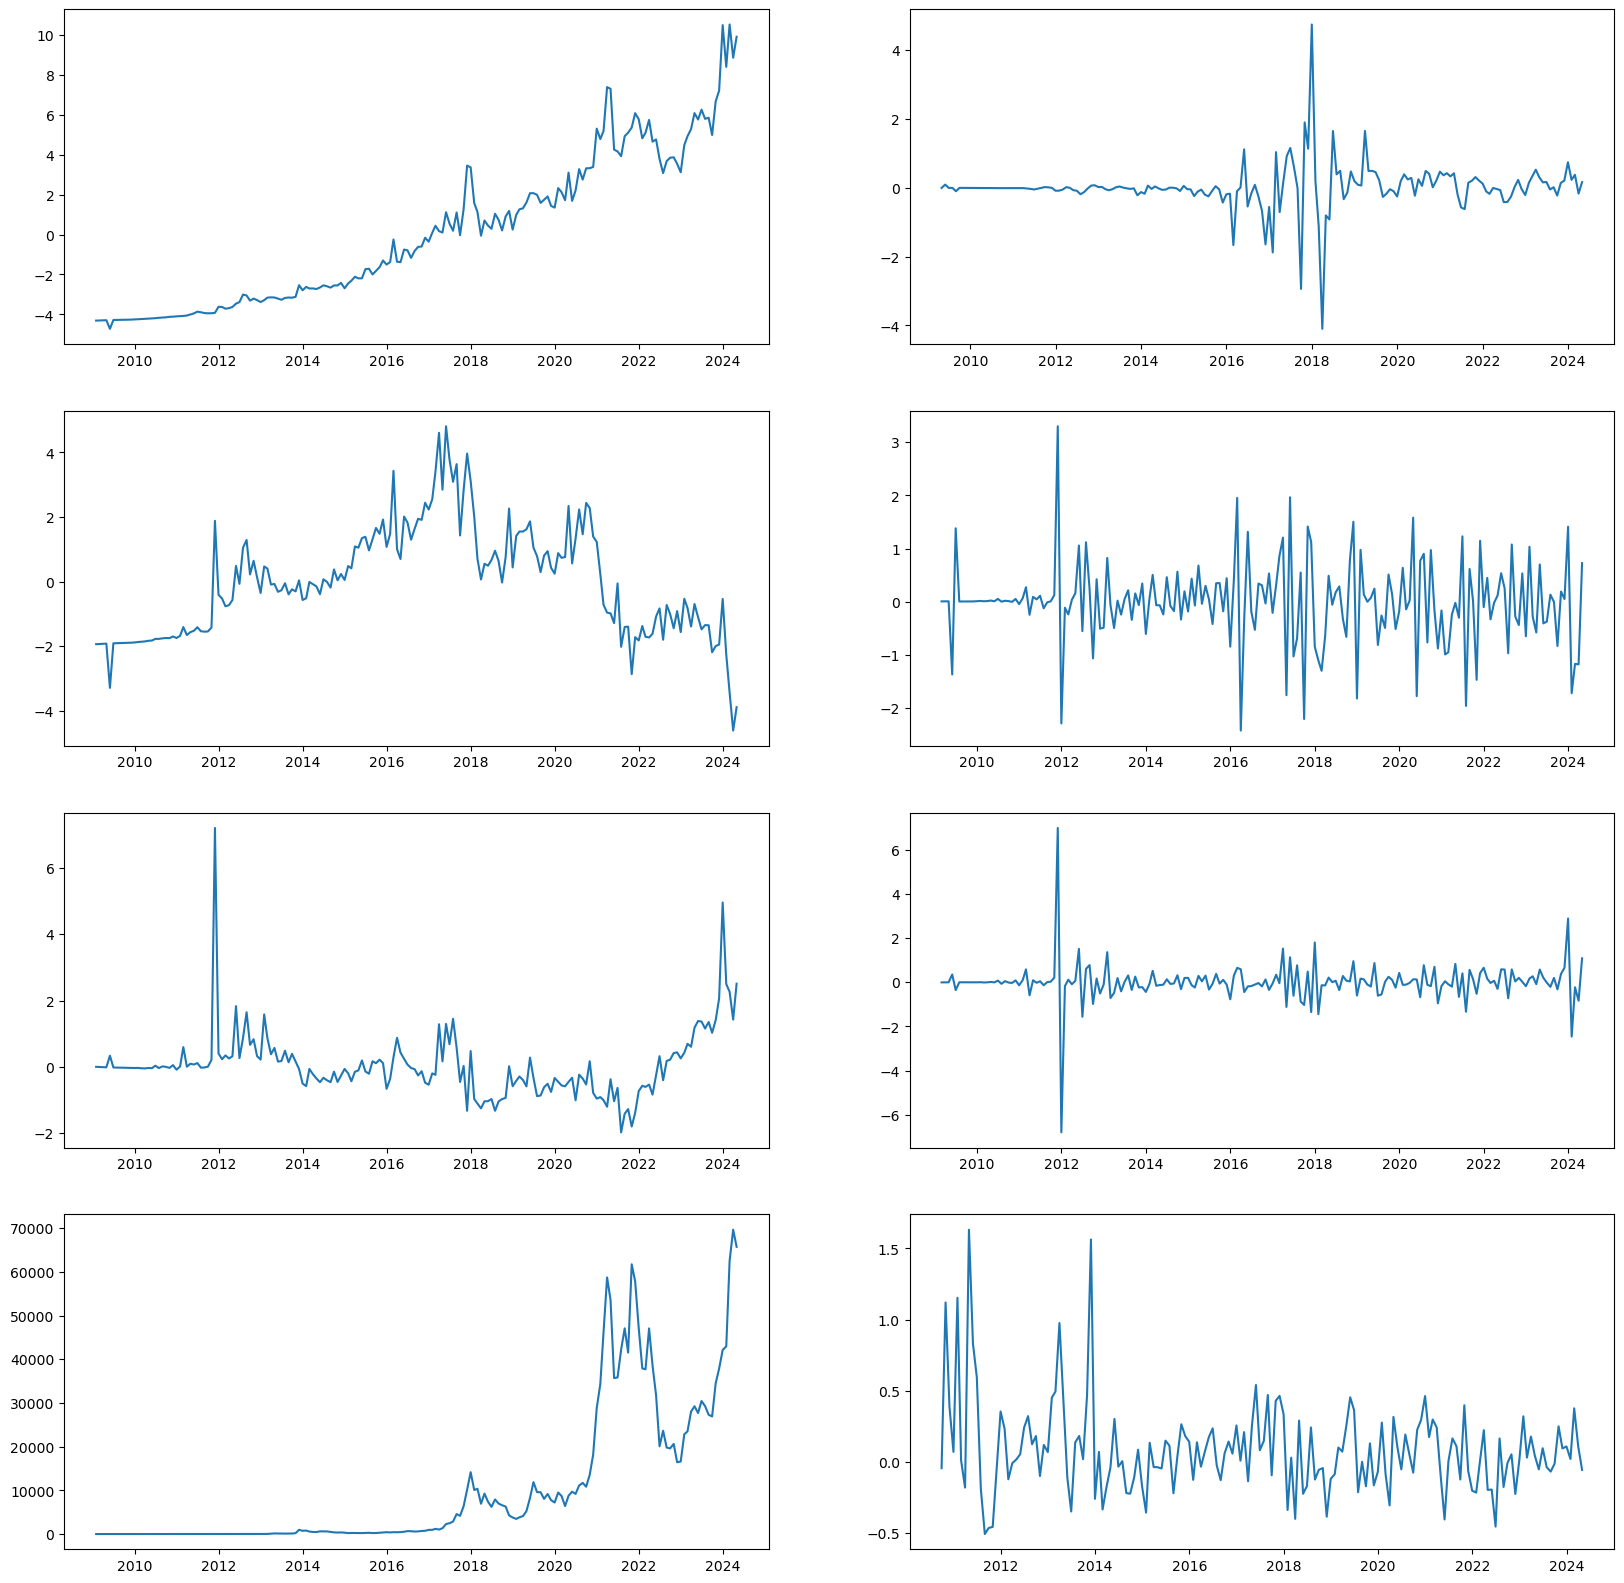

In [248]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(20,20))

ax[0][0].plot(monthly_pca_bitcoin_df['PCA1'])
ax[0][1].plot(np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3))

ax[1][0].plot(monthly_pca_bitcoin_df['PCA2'])
ax[1][1].plot(monthly_pca_bitcoin_df['PCA2'].diff())

ax[2][0].plot(monthly_pca_bitcoin_df['PCA6'])
ax[2][1].plot(monthly_pca_bitcoin_df['PCA6'].diff())

ax[3][0].plot(monthly_pca_bitcoin_df['Market Price'])
ax[3][1].plot(np.log(abs(monthly_pca_bitcoin_df['Market Price'])).diff())

In [249]:
np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff()

date
2009-01-31         NaN
2009-02-28   -0.001500
2009-03-31   -0.001579
2009-04-30   -0.001569
2009-05-31    0.096101
                ...   
2023-12-31    0.374701
2024-01-31   -0.222413
2024-02-29    0.225337
2024-03-31   -0.172171
2024-04-30    0.112092
Freq: M, Name: PCA1, Length: 184, dtype: float64

That should take care of our Transformations necessary for our Models so let's save these transforms into our *monthly_pca_bitcoin_df* and proceed to our preprocessing phase.

In [250]:
for pc in ['PCA1', 'PCA2', 'PCA6', 'Market Price']:
    if pc == 'PCA1':
        monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3)
    elif pc == 'Market Price':
       monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['Market Price'])).diff()
    else:
        monthly_pca_bitcoin_df[f'{pc}_stationary'] = monthly_pca_bitcoin_df[pc].diff()

C:\Users\micha\AppData\Local\Temp\ipykernel_27776\37240690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3)
C:\Users\micha\AppData\Local\Temp\ipykernel_27776\37240690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df[f'{pc}_stationary'] = monthly_pca_bitcoin_df[pc].diff()
C:\Users\micha\AppData\Local\Temp\ipykernel_27776\37240690.py:7: SettingWithCopyWarning: 
A value is trying to be 

In [251]:
monthly_pca_bitcoin_df.dropna(inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_27776\1539485645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df.dropna(inplace=True)


In [252]:
monthly_pca_bitcoin_df.drop(index='2010-08-31', inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_27776\96756979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df.drop(index='2010-08-31', inplace=True)


In [253]:
for col in monthly_pca_bitcoin_df.columns:
    if col == 'PCA1' or col == 'PCA2' or col == 'PCA6' or col == 'Market Price':
        continue
    else:
        results = adfuller(monthly_pca_bitcoin_df[col])
        print(f'{col}: {results[1]}')

PCA3: 0.0024887571289670426
PCA4: 0.0031903743858384863
PCA5: 0.05240896926478116
PCA7: 0.0009089811213774789
PCA8: 3.371611243315286e-05
PCA9: 0.025955209065977446
PCA10: 0.022185681586967244
PCA11: 3.0456107336741435e-05
PCA12: 0.0033321345950458495
PCA1_stationary: 6.273045700180121e-07
PCA2_stationary: 9.797937885315451e-25
PCA6_stationary: 1.2098753698342123e-15
Market Price_stationary: 2.4465066872840788e-06


All of our features are now sufficiently stationary for the Analysis.

##### Pre-Processing
***
- Separate into _X_ and _y_ and create _train_, _test_ and/or _validate_ data sets


In [254]:
X_prime = monthly_pca_bitcoin_df[['PCA1_stationary', 'PCA2_stationary', 'PCA3', 'PCA4', 'PCA5', 'PCA6_stationary', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'Market Price_stationary']].rename(columns={'PCA1_stationary': 'PCA1',
                                                                                                                                                                                                                'PCA2_stationary': 'PCA2',
                                                                                                                                                                                                                'PCA6_stationary': 'PCA6',
                                                                                                                                                                                                                'Market Price_stationary': 'Market Price'})

In [255]:
X_prime.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Market Price
date,,,,,,,,,,,,,
2010-09-30,-0.010319,0.010471,0.457342,-0.493387,-0.087789,-0.014372,0.169396,0.196478,-0.528685,0.025425,0.136106,-0.089705,-0.045713
2010-10-31,-0.011720,-0.004247,0.466204,-0.476186,-0.088233,-0.031368,0.171458,0.183535,-0.512908,0.015964,0.093078,-0.083149,1.119890
2010-11-30,-0.010678,0.051437,0.454114,-0.423881,-0.088609,0.083576,0.126553,0.108282,-0.542487,0.017146,0.074371,-0.073406,0.387766
2010-12-31,-0.011909,-0.046599,0.445535,-0.503403,-0.089173,-0.137684,0.189747,0.212922,-0.480426,0.018838,0.080851,-0.069971,0.068993
2011-01-31,-0.007835,0.065953,0.435146,-0.427536,-0.087742,0.097656,0.138537,0.162758,-0.519869,0.023465,0.063826,-0.061376,1.152680
